In [10]:
import numpy as np
import pandas as pd
import os
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats # to remove outliers
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split


In [11]:
os.getcwd()
os.chdir('C:/Users/fatem/OneDrive/Documents/doc/free-data')
data = pd.read_csv('breast cancer/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [12]:
np.sum(pd.isnull(data))

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [13]:
#remove unnamed column:
data.dropna(axis =1,inplace = True)

In [7]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [14]:
#Selecting numeric columns:
df = data [['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

In [15]:
#remove outliers from numeric columns:
df = df[(np.abs(stats.zscore(df))<3).all(axis = 1)]
df.describe()


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,...,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,13.868883,18.889778,89.931939,622.613333,0.095075,0.094741,0.074145,0.043306,0.177602,0.061779,...,15.846776,25.152343,103.961111,820.704848,0.130829,0.231213,0.240894,0.106625,0.283788,0.081467
std,3.042868,3.966250,20.795084,286.903247,0.012822,0.041071,0.061694,0.032550,0.023258,0.005546,...,4.130793,5.666008,28.312550,452.870860,0.021069,0.125632,0.171007,0.058203,0.049675,0.014411
min,6.981000,9.710000,43.790000,143.500000,0.062510,0.019380,0.000000,0.000000,0.116700,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.081250,0.034320,0.000000,0.000000,0.156500,0.055040
25%,11.745000,16.000000,75.475000,424.800000,0.085345,0.062310,0.027420,0.019485,0.160800,0.057490,...,13.055000,20.845000,84.440000,517.150000,0.115950,0.140000,0.106450,0.063060,0.248750,0.070830
50%,13.210000,18.580000,85.630000,538.900000,0.094620,0.085490,0.053080,0.030700,0.177100,0.061150,...,14.800000,25.110000,96.530000,670.000000,0.130100,0.203100,0.195600,0.092220,0.278500,0.078750
75%,15.290000,21.460000,100.250000,718.050000,0.103700,0.120150,0.107250,0.062770,0.193000,0.065105,...,17.730000,28.900000,117.700000,970.050000,0.143600,0.305050,0.349200,0.148950,0.311300,0.089850
max,23.270000,30.720000,152.100000,1686.000000,0.137100,0.228400,0.317400,0.156200,0.254000,0.079760,...,28.190000,41.610000,195.900000,2403.000000,0.190900,0.664300,0.848900,0.270100,0.475300,0.134100


In [16]:
#computing the number of removed rows from dataset:
print(data.shape)
print(df.shape)
num_outliers = data.shape[0]-df.shape[0]
print("%d rows were outliers and they were removed from dataset." %num_outliers)

(569, 32)
(495, 30)
74 rows were outliers and they were removed from dataset.


In [17]:
# making a new dataset from numeric columns and target column(Diagnosis column):
print(df.index)
new_data = pd.concat([data['diagnosis'] , df],axis = 'columns')
new_data.dropna(how = 'any',axis = 'rows',inplace = True)
new_data

Int64Index([  1,   2,   4,   5,   6,   7,   8,  10,  11,  13,
            ...
            553, 554, 555, 556, 558, 560, 563, 564, 565, 566],
           dtype='int64', length=495)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.30,33.17,100.2,706.7,0.1241,0.2264,0.1326,0.1048,0.2250,0.08321
563,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,...,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,0.06171,...,15.30,33.17,100.2,706.7,0.1241,0.2264,0.1326,0.1048,0.2250,0.08321
563,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,0.2149,0.06879,...,24.29,29.41,179.1,1819.0,0.1407,0.4186,0.6599,0.2542,0.2929,0.09873
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.45,26.40,166.1,2027.0,0.1410,0.2113,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.69,38.25,155.0,1731.0,0.1166,0.1922,0.3215,0.1628,0.2572,0.06637


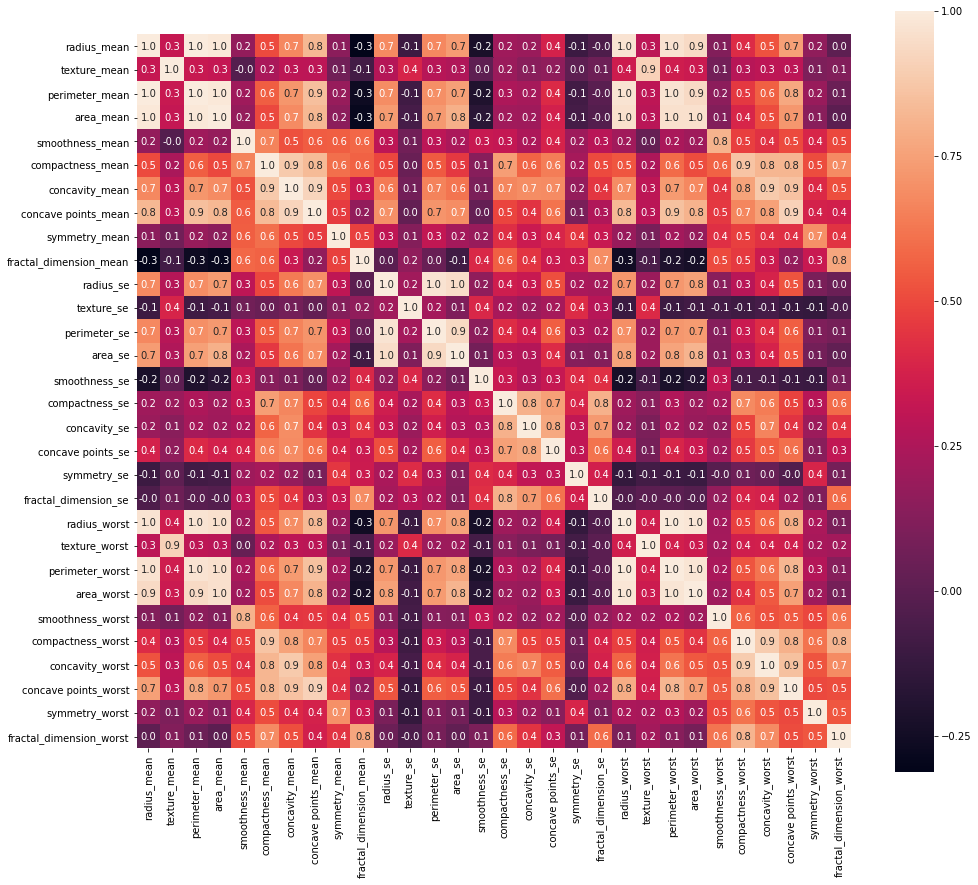

In [18]:
#converting Diagnosis column to numeric columns and showing correlation between features:
new_data_ = pd.get_dummies(data)
new_data_ = data.drop(['id'],axis = 1)
corr = new_data_.corr()
plt.subplots(figsize = (16,14))
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sb.heatmap(corr , fmt = '.1f' , square = True,annot = True)

Text(0.5, 1.0, 'The quartile of some features for Malignant and Benign Patients')

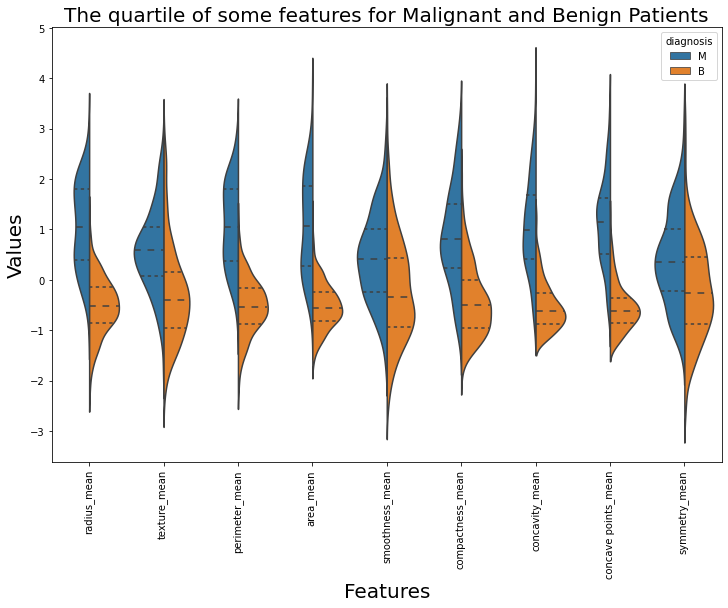

In [20]:
# select 11 first columns and devide them to two groups of binary and numeric columns:

x = new_data.iloc[:,1:10] #select 10 columns from new_data
x = (x - x.mean())/x.std() #Normalize data
y = new_data['diagnosis']
xy_data = pd.concat([y,x],axis = 1)

#using melt function to create three columns, they consist of diagnosis, features and values:
df = pd.melt(xy_data, id_vars=['diagnosis'], value_name ='value' ,var_name = 'feature')#define feature and value column

#plot
plt.figure(figsize = (12,8))
sb.violinplot(data = df , x ='feature' , y = 'value', hue ='diagnosis', inner = 'quart',split = True )
plt.xticks(rotation = 90)
plt.xlabel("Features",fontsize = 20)
plt.ylabel("Values", fontsize = 20)
plt.title("The quartile of some features for Malignant and Benign Patients",fontsize = 20)

Text(0.5, 1.0, 'The quartile of features for Malignant and Benign Patients')

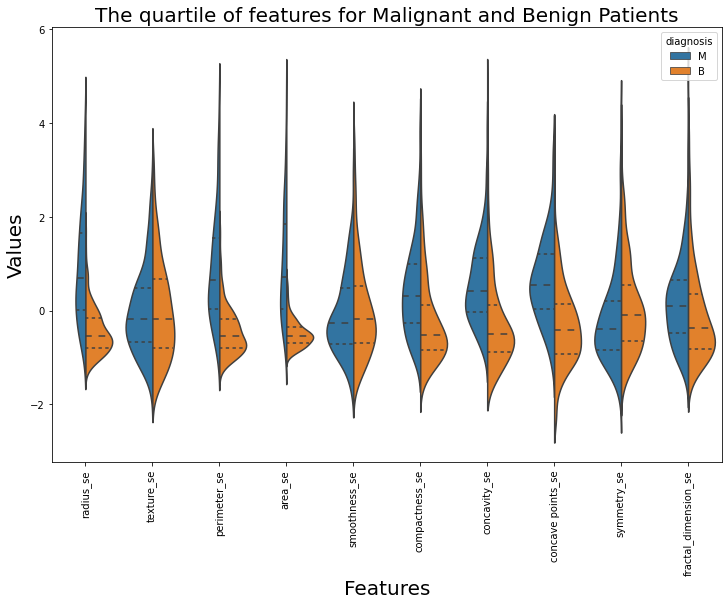

In [21]:
# select the next 10 columns and devide them to two groups of binary and numeric columns:
x = new_data.iloc[:,11:21] #select 10 columns from new_data
x = (x - x.mean())/x.std() #Normalize data
y = new_data['diagnosis']
xy_data = pd.concat([y,x],axis = 1)

#using melt function to create three columns, they consist of diagnosis, features and values:
df = pd.melt(xy_data, id_vars=['diagnosis'], value_name ='value' ,var_name = 'feature')#define feature and value column

#plot
plt.figure(figsize = (12,8))
sb.violinplot(data = df , x ='feature' , y = 'value', hue ='diagnosis', inner = 'quart',split = True )
plt.xticks(rotation = 90)
plt.xlabel("Features",fontsize = 20)
plt.ylabel("Values", fontsize = 20)
plt.title("The quartile of features for Malignant and Benign Patients",fontsize = 20)

Text(0.5, 1.0, 'The quartile of features in Malignant and Benign Patients')

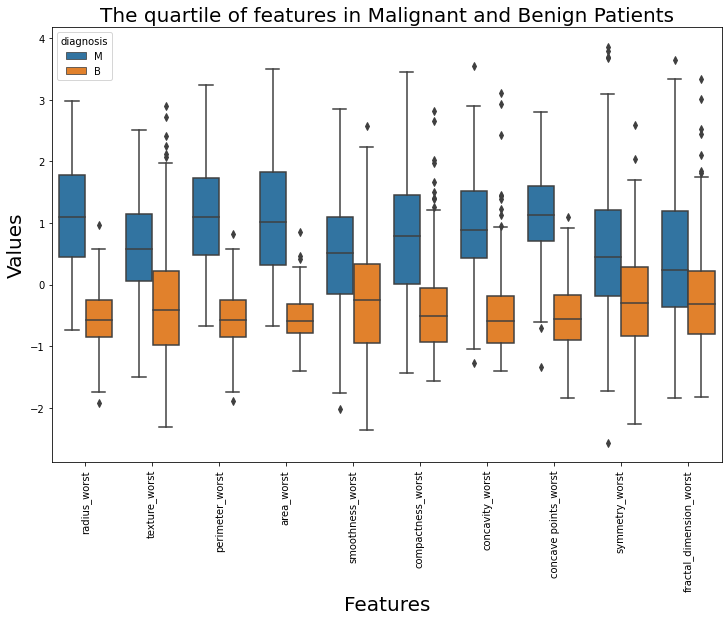

In [22]:
# select the next 10 columns and devide them to two groups of binary and numeric columns:
x = new_data.iloc[:,21:] #select 10 columns from new_data
x = (x - x.mean())/x.std() #Normalize data
y = new_data['diagnosis']
xy_data = pd.concat([y,x],axis = 1)

#using melt function to create three columns, they consist of diagnosis, features and values:
df = pd.melt(xy_data, id_vars=['diagnosis'], value_name ='value' ,var_name = 'feature')#define feature and value column

#plot
plt.figure(figsize = (12,8))
sb.boxplot(data = df , x ='feature' , y = 'value', hue ='diagnosis' )
plt.xticks(rotation = 90)
plt.xlabel("Features",fontsize = 20)
plt.ylabel("Values", fontsize = 20)
plt.title("The quartile of features in Malignant and Benign Patients",fontsize = 20)

Text(0.5, 1.0, 'The proportion of benign and malignant patients in the dataset\n')

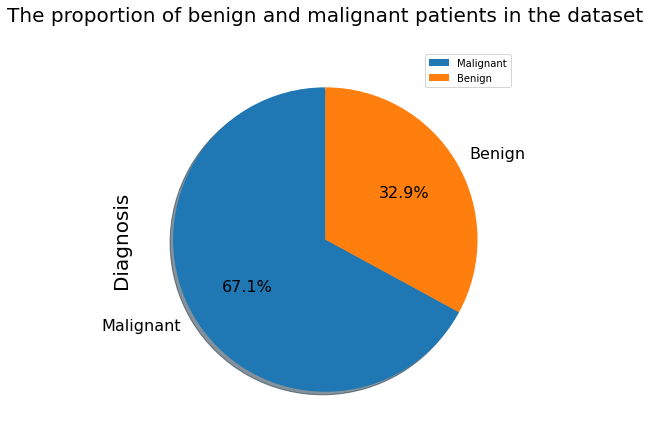

In [23]:
#plotting a pieplot to show the proportion of benign and malignant tumor among patients in the dataset:
cont_diag = new_data['diagnosis'].value_counts()

label = 'Malignant', 'Benign'
cont_diag.plot.pie(subplots = True, figsize = (7,7),legend = True,startangle = 90,labels = label,
                   shadow = True, autopct = '%1.1f%%',textprops={'fontsize': 16})
plt.ylabel('Diagnosis',fontsize = 20)
plt.title("The proportion of benign and malignant patients in the dataset\n",fontsize = 20)

In [24]:
#Using Select K-Best algorithm for finding features with high relationship with target column: 
x1 = new_data.iloc[:,1:]
y1 = new_data.iloc[:,0]
x_new1 = SelectKBest(chi2, k=15).fit(x1, y1)
scores1 = x_new1.scores_.astype(np.int)
p_value1 = x_new1.pvalues_

scores1 = np.vstack([x1.columns,scores1,p_value1]).T
scores_df1 = pd.DataFrame(scores1 , columns = ['features','scores','p_value'])
scores_df1.sort_values(by = 'scores',inplace = True,ascending = False)
scores_df1 = scores_df1[np.logical_and(scores_df1['scores']>0,scores_df1['p_value']<0.05)]
# scores_df1 = scores_df1[scores_df1['scores']>0]
print(scores_df1)


                features scores       p_value
23            area_worst  76151             0
3              area_mean  36313             0
13               area_se   5308             0
22       perimeter_worst   2446             0
2         perimeter_mean   1351  7.94668e-296
20          radius_worst    336   3.05096e-75
0            radius_mean    181   2.63572e-41
12          perimeter_se    148   3.85272e-34
21         texture_worst    123   8.68309e-29
1           texture_mean     68   1.48896e-16
26       concavity_worst     28   9.84006e-08
10             radius_se     22   2.18305e-06
6         concavity_mean     14   0.000149965
25     compactness_worst     11   0.000696395
27  concave points_worst      9    0.00200227
7    concave points_mean      7     0.0059768


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 <a list of 16 Text major ticklabel objects>)

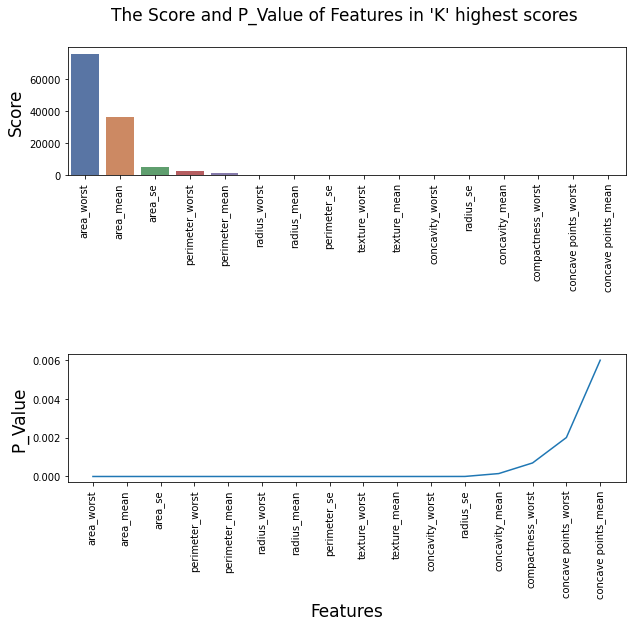

In [25]:
#plotting the score and p-value of selected features:
plt.figure(figsize= (10,8))
plt.subplot(3,1,1)
sb.barplot(data = scores_df1, x = scores_df1['features'], y = scores_df1['scores'] , palette="deep")
plt.ylabel("Score",fontsize = 17)
plt.xlabel(" ",fontsize = 17)
plt.title("The Score and P_Value of Features in 'K' highest scores \n",fontsize = 17)
plt.xticks(rotation = 90)
plt.subplot(3,1,3)
plt.plot(scores_df1['features'], scores_df1['p_value'] )
# scores_df.plot.bar( rot = 0, subplots = True)
plt.xlabel("Features",fontsize = 17)
plt.ylabel("P_Value",fontsize = 17)
plt.xticks(rotation = 90)

                      diagnosis_M
area_worst               0.768851
area_mean                0.719153
area_se                  0.697584
perimeter_worst          0.773334
perimeter_mean           0.729743
radius_worst             0.768176
radius_mean              0.716884
perimeter_se             0.611471
texture_worst            0.459070
texture_mean             0.449759
concavity_worst          0.689041
radius_se                0.606552
concavity_mean           0.719921
compactness_worst        0.577372
concave points_worst     0.750698
concave points_mean      0.749222
diagnosis_B             -1.000000


Text(0.5, 1.0, 'The correlation between selected features and diagnosis column\n ')

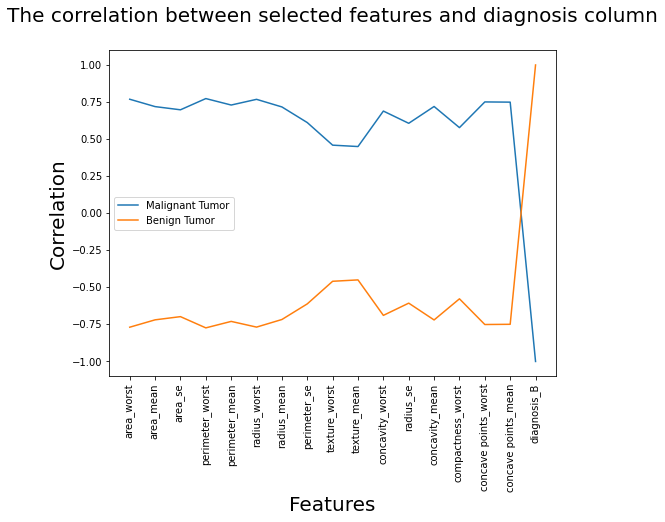

In [26]:
#plotting a line plot to show the correlation between selected features and target column:
data_corr2 = new_data[scores_df1['features']] #select columns from K-Best algorithm
new_data_ = pd.get_dummies(new_data) #covert categorical column(diagnosis) to numeric column
data_corr2 = pd.concat([data_corr2 , new_data_[['diagnosis_B','diagnosis_M']]],axis = 'columns')

corr2 = data_corr2.corr(method = "spearman") #computing the correlation between features and diagnosis columns
corr2.shape
print(corr2.iloc[:17,17:])
plt.figure(figsize = (8,6))
plt.plot(corr2.iloc[:17,17:])
plt.plot(corr2.iloc[:17,16:17])
label = ["Malignant Tumor","Benign Tumor"]
plt.legend(loc = 'center left',labels = label)
plt.xlabel("Features",fontsize = 20)
plt.xticks(rotation = 90)
plt.ylabel("Correlation",fontsize = 20)
plt.title("The correlation between selected features and diagnosis column\n ",fontsize = 20)


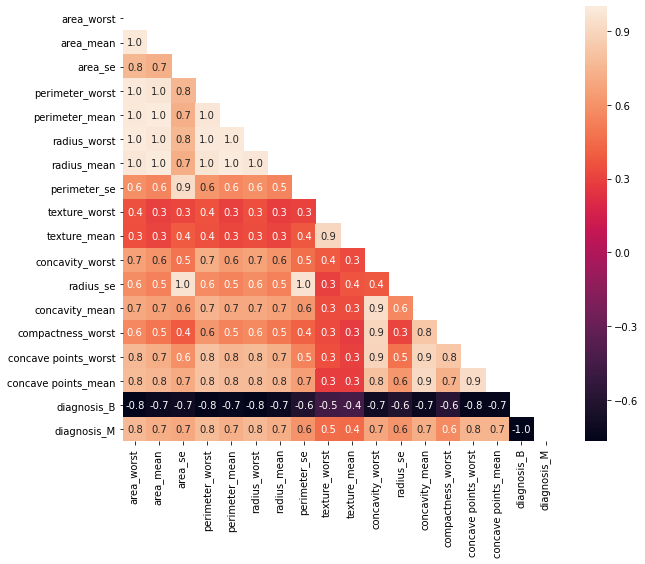

In [27]:
#heatmap among selected features:
plt.subplots(figsize = (10,8))
mask = np.zeros_like(corr2)
mask[np.triu_indices_from(mask)] = True

sb.heatmap(corr2 , fmt = '.1f' , square = True,annot = True,robust = True,mask = mask)


Accuracy is:  0.98989898989899


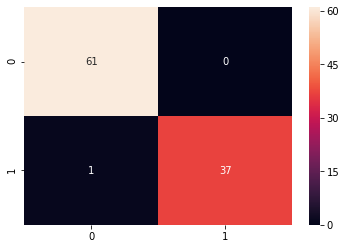

In [28]:
# using Random Forest Classifier for selected features from K-best algorithm:

X = new_data[scores_df1['features']]
y = new_data['diagnosis']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


rfc = RandomForestClassifier(random_state=43)      
rfc_fit = rfc.fit(x_train,y_train)
ac = accuracy_score(y_test,rfc_fit.predict(x_test))

print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,rfc_fit.predict(x_test))
sb.heatmap(cm,annot=True,fmt="d")

Accuracy is:  0.9649122807017544


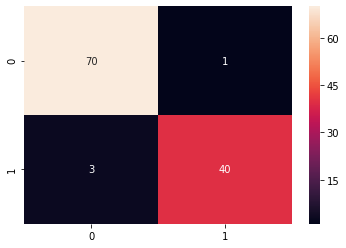

In [29]:
# using Random Forest Classifier without preparing the dataset: 

X = data.drop(['id','diagnosis'],axis =1)
y = data['diagnosis']
x_train2, x_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.20, random_state=42)


rfc = RandomForestClassifier(random_state=43)      
rfc_fit = rfc.fit(x_train2,y_train2)
ac = accuracy_score(y_test2,rfc_fit.predict(x_test2))

print('Accuracy is: ',ac)
cm = confusion_matrix(y_test2,rfc_fit.predict(x_test2))
sb.heatmap(cm,annot=True,fmt="d")